In [4]:
import cv2
from image_utils import get_first_frame
import matplotlib.pyplot as plt
import numpy as np

yes


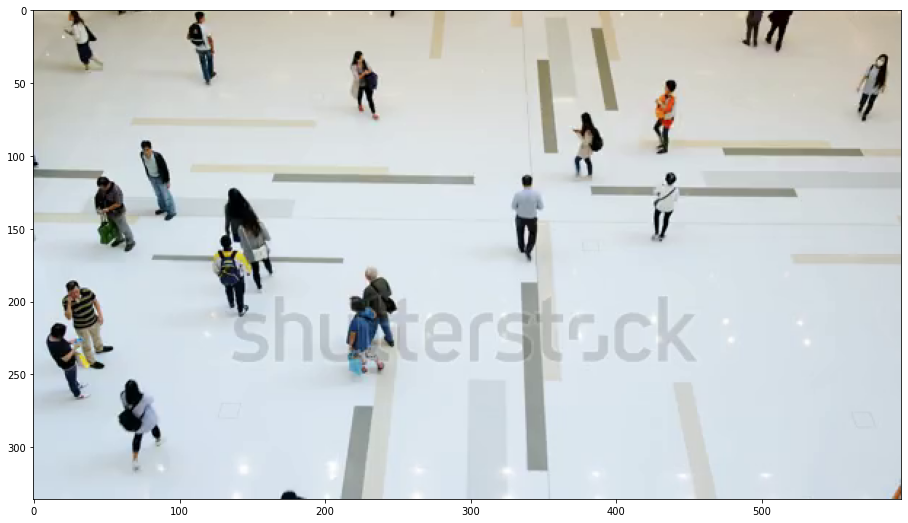

In [104]:
im = get_first_frame('/Users/tharakarehan/Desktop/Object_Tracking/People_Videos/MOT6.mp4')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
h,w,_=im.shape
plt.figure(figsize=(16,9))
plt.imshow(im)
plt.show()
trans_points =  [(351, 256), (439, 257), (454, 332), (355, 333), (351, 256)]

In [105]:
def distcord(p1,p2):
    dist = (p1[0]-p2[0])**2+(p1[1]-p2[1])**2
    return dist**0.5

def order_points(pts):
	# initialzie a list of coordinates that will be ordered
	# such that the first entry in the list is the top-left,
	# the second entry is the top-right, the third is the
	# bottom-right, and the fourth is the bottom-left
	rect = np.zeros((4, 2), dtype = "float32")
	# the top-left point will have the smallest sum, whereas
	# the bottom-right point will have the largest sum
	s = pts.sum(axis = 1)
	rect[0] = pts[np.argmin(s)]
	rect[2] = pts[np.argmax(s)]
	# now, compute the difference between the points, the
	# top-right point will have the smallest difference,
	# whereas the bottom-left will have the largest difference
	diff = np.diff(pts, axis = 1)
	rect[1] = pts[np.argmin(diff)]
	rect[3] = pts[np.argmax(diff)]
	# return the ordered coordinates
	return rect

trans_points = np.array(trans_points[:-1])
src_pts = order_points(trans_points)
(tl, tr, br, bl) = src_pts
sqlen = max(distcord(tl,tr),distcord(tl,bl))
target_pts = np.array(((0+w,0+h),(w+sqlen,h),(w+sqlen,h+sqlen),(w+0,h+sqlen)), dtype = "float32")
M = cv2.getPerspectiveTransform(src_pts,target_pts)
original_corners = [(0,0),(w,0),(w,h),(0,h)]

list_X_min,list_Y_min = [],[]

for pt in original_corners:
	x1,y1,z = np.matmul(M,np.array([pt[0],pt[1],1]))
	X,Y = x1/z,y1/z
	list_X_min.append(X)
	list_Y_min.append(Y)

MinX = min(min(list_X_min),0)
MinY = min(min(list_Y_min),0)

T = np.array([[1, 0, -MinX],[0, 1, -MinY],[0, 0, 1]])
M_translated = np.dot(T,M)

list_X_max,list_Y_max = [],[]

for pt in original_corners:
	x1,y1,z = np.matmul(M_translated,np.array([pt[0],pt[1],1]))
	X,Y = x1/z,y1/z
	list_X_max.append(X)
	list_Y_max.append(Y)

MaxX = max(list_X_max)
MaxY = max(list_Y_max)

MinX = int(min(list_X_max))
MinY = int(min(list_Y_max))

print('X',MaxX)
print('Y',MaxY)
warped = cv2.warpPerspective(im, M_translated, (int(np.ceil(MaxX)), int(np.ceil(MaxY))))
warped = warped[MinY:,MinX:,:]

X 1109.1259472606387
Y 774.3465554225846


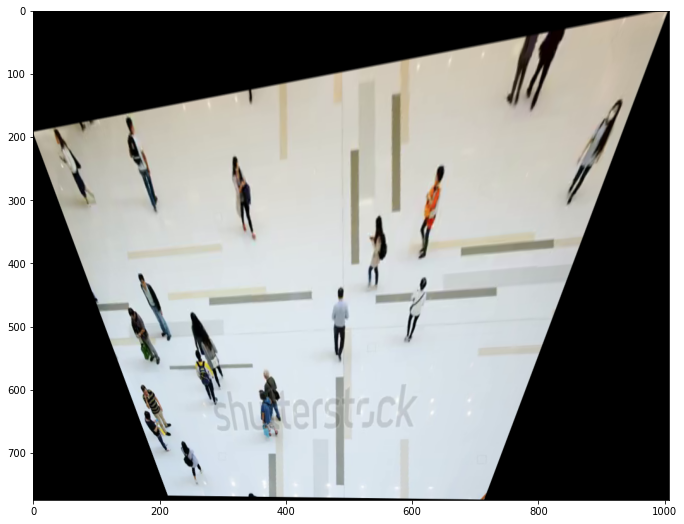

In [106]:
plt.figure(figsize=(16,9))
plt.imshow(warped)
plt.show()